# Nobel Ödülleri Veri Analizi

## Giriş:

1901 yılından bu yana verilen **Nobel Ödülleri**, bilim, edebiyat ve barış gibi alanlarda insanlığa olağanüstü katkı sağlayan kişileri onurlandırmak amacıyla verilmektedir.
Bu prestijli ödüller, sadece bireysel başarıları değil, aynı zamanda ülkelerin bilimsel ve kültürel altyapılarını da gözler önüne serer.

Bu analizde, Nobel Ödülleri’nin tarihsel sürecine veri üzerinden bakacak ve aşağıdaki sorulara cevap arayacağız:

1.  Hangi ülkeler en çok ödül kazandı?
2.  Ödüller zamanla nasıl dağıldı?
3.  Cinsiyet dağılımı nasıl değişti?
4.  Hangi kategorilerde yoğunluk var?

------------

## Amaç:

Bu proje, Nobel Ödülleri verisi üzerinden;
* Temel istatistiksel özetler sunmak,
* Görselleştirmelerle bulguları desteklemek,
* Ve veri üzerinden hikâye anlatma becerisini geliştirmek amacıyla hazırlanmıştır.

------------

## Veri Hakkında:

* Kullanılan veri seti, Nobel Ödülü kazanan bireylerin:
* Doğum ülkesi,
* Ödül yılı,
* Cinsiyeti,
* Kategorisi gibi bilgilerini içermektedir.

Kaynak: [Kaggle - Nobel Prize Dataset](https://www.kaggle.com/datasets/nobelfoundation/nobel-laureates)

![Nobel Madalyası](Nobel_Prize.png)


### Veri Yükleme ve Temizlik

Veri setimizi `nobel.csv` dosyasından yükleyip, bazı eksik değerleri doldurarak analiz için hazır hale getirdik. Tarih sütunlarını da uygun datetime formatına çevirdik.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_nobel = pd.read_csv('nobel.csv')

df_nobel['sex'] = df_nobel['sex'].fillna('Unknown')
df_nobel['birth_country'] = df_nobel['birth_country'].fillna('Unknown')

df_nobel['birth_date'] = pd.to_datetime(df_nobel['birth_date'], errors='coerce')
df_nobel['death_date'] = pd.to_datetime(df_nobel['death_date'], errors='coerce')


plt.rcParams["figure.figsize"] = (8, 4)

In [65]:
df_nobel.head()


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


### 🧾 Veri Seti Özeti

Veri kümesi, Nobel Ödülü kazanan kişilere ait detaylı bilgileri içermektedir. Her satır bir ödül sahibini temsil etmektedir.

Aşağıda veri kümesinde bulunan sütunların açıklamaları yer almaktadır:

| Sütun Adı             | Açıklama |
|------------------------|----------|
| `year`                | Ödülün verildiği yıl |
| `category`            | Ödül kategorisi (Fizik, Kimya, Barış, vs.) |
| `prize`               | Verilen ödülün adı (bazı yıllarda özel isimli olabilir) |
| `motivation`          | Kişinin ödülü alma gerekçesi |
| `prize_share`         | Ödülün kaç kişiyle paylaşıldığı |
| `laureate_id`         | Ödül kazanan kişiye özel tanımlayıcı ID |
| `laureate_type`       | Kişi mi kurum mu olduğunu belirtir |
| `full_name`           | Ödül kazananın tam adı |
| `birth_date`          | Doğum tarihi |
| `birth_city`          | Doğduğu şehir |
| `birth_country`       | Doğduğu ülke |
| `sex`                 | Cinsiyeti |
| `organization_name`   | Ödül alırken çalıştığı kurumun adı |
| `organization_city`   | Kurumun bulunduğu şehir |
| `organization_country`| Kurumun bulunduğu ülke |
| `death_date`          | Ölüm tarihi (varsa) |
| `death_city`          | Öldüğü şehir |
| `death_country`       | Öldüğü ülke |


### Soru 1: Nobel Ödüllerini en çok kazanan ilk on ülke hangileridir?

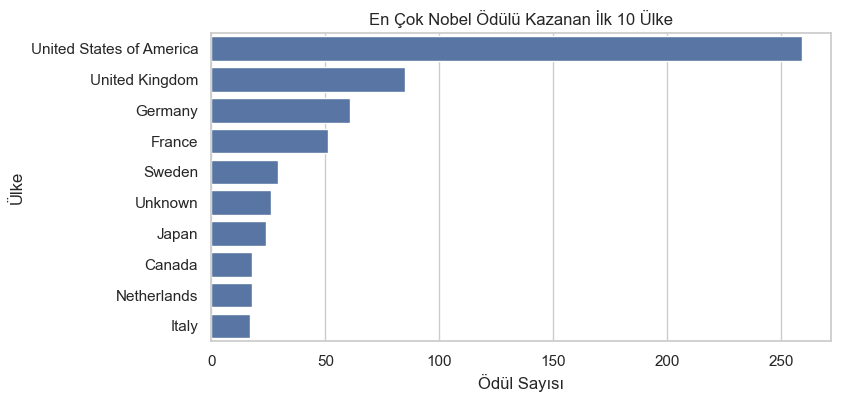

In [66]:
top10_countries = df_nobel['birth_country'].value_counts().head(10)
sns.barplot(x=top10_countries.values, y=top10_countries.index)
plt.title("En Çok Nobel Ödülü Kazanan İlk 10 Ülke")
plt.xlabel("Ödül Sayısı")
plt.ylabel("Ülke")
plt.show()

**Grafik Yorumu:**

Grafikte, Nobel Ödülleri'ni en çok kazanan ülkeler gösterilmiştir. Amerika Birleşik Devletleri açık farkla ilk sıradadır. Bu durum, bilimsel ve kültürel yatırımların ödül kazanımında önemli rol oynadığını göstermektedir. Ayrıca göç hareketleri, savaşlar sonrası beyin göçü gibi tarihsel faktörler de bu tabloya etki etmektedir.

## 2. Soru: Nobel Ödüllerini kazanan ilk kadınları listeleyiniz

In [67]:
first_female_winners = (
    df_nobel[
        (df_nobel['sex'] == 'Female') &
        (df_nobel['full_name'].notna()) &
        (df_nobel['year'].notna())
    ]
    .sort_values('year')
    .drop_duplicates(subset='full_name', keep='first')
)
first_female_winners.head(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy
141,1928,Literature,The Nobel Prize in Literature 1928,"""principally for her powerful descriptions of ...",1/1,601,Individual,Sigrid Undset,1882-05-20,Kalundborg,Denmark,Female,NaN,NaN,NaN,1949-06-10,Lillehammer,Norway
160,1931,Peace,The Nobel Peace Prize 1931,NaN,1/2,496,Individual,Jane Addams,1860-09-06,"Cedarville, IL",United States of America,Female,NaN,NaN,NaN,1935-05-21,"Chicago, IL",United States of America
179,1935,Chemistry,The Nobel Prize in Chemistry 1935,"""in recognition of their synthesis of new radi...",1/2,194,Individual,Irène Joliot-Curie,1897-09-12,Paris,France,Female,Institut du Radium,Paris,France,1956-03-17,Paris,France
198,1938,Literature,The Nobel Prize in Literature 1938,"""for her rich and truly epic descriptions of p...",1/1,610,Individual,Pearl Buck,1892-06-26,"Hillsboro, WV",United States of America,Female,NaN,NaN,NaN,1973-03-06,"Danby, VT",United States of America
218,1945,Literature,The Nobel Prize in Literature 1945,"""for her lyric poetry which, inspired by power...",1/1,615,Individual,Gabriela Mistral,1889-04-07,Vicuña,Chile,Female,NaN,NaN,NaN,1957-01-10,"Hempstead, NY",United States of America
229,1946,Peace,The Nobel Peace Prize 1946,NaN,1/2,506,Individual,Emily Greene Balch,1867-01-08,"Jamaica Plain, MA (Boston)",United States of America,Female,NaN,NaN,NaN,1961-01-09,"Cambridge, MA",United States of America


### Nobel Ödülü Kazanan İlk Kadınlar

Bu tabloda, Nobel Ödülü kazanan ilk kadınları görebiliyoruz. Listenin başında yer alan Marie Curie, 1903 yılında Fizik ödülünü kazanarak Nobel tarihinde bir ilki gerçekleştirmiştir.

Kadınların ödül almaya başlaması, erkeklere kıyasla oldukça geç olmuştur. Bu durum, dönemin toplumsal koşulları ve bilimsel çevrelerdeki eşitsizlikleri düşündüğümüzde şaşırtıcı değildir. Ancak yine de burada yer alan isimler, o dönemin zorluklarına rağmen önemli başarılara imza atmış ve bilim dünyasında kalıcı izler bırakmıştır.

Bu tablo, yalnızca bireysel başarıları değil; aynı zamanda kadınların Nobel tarihinde nasıl bir yolculuk izlediğini de göstermektedir.

## 3. Soru: Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz

In [68]:
first_male_winners = (
    df_nobel[
        (df_nobel['sex'] == 'Male') &
        (df_nobel['full_name'].notna()) &
        (df_nobel['year'].notna())
    ]
    .sort_values('year')
    .drop_duplicates(subset='full_name', keep='first')
)
first_male_winners.head(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
11,1902,Physics,The Nobel Prize in Physics 1902,"""in recognition of the extraordinary service t...",1/2,2,Individual,Hendrik Antoon Lorentz,1853-07-18,Arnhem,Netherlands,Male,Leiden University,Leiden,Netherlands,1928-02-04,NaN,Netherlands
10,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland
12,1902,Physics,The Nobel Prize in Physics 1902,"""in recognition of the extraordinary service t...",1/2,3,Individual,Pieter Zeeman,1865-05-25,Zonnemaire,Netherlands,Male,Amsterdam University,Amsterdam,Netherlands,1943-10-09,Amsterdam,Netherlands


### Nobel Ödülü Kazanan İlk Erkekler

Bu tablo, Nobel Ödüllerinin başlangıç yıllarındaki erkek ödül sahiplerini göstermektedir. 1901 yılında başlayan ödül sürecinde, ilk kazananlar neredeyse tamamen erkek bireylerden oluşmuştur.

Bu sonuç, o dönemde bilimsel üretim alanlarına erkeklerin büyük oranda hâkim olduğunu ve kadınların bu alanlara erişiminin oldukça sınırlı olduğunu ortaya koymaktadır. Erkekler uzun yıllar boyunca Nobel sahnesinde baskın bir pozisyona sahip olmuşlardır.

Bu tabloyu bir önceki tabloyla birlikte değerlendirdiğimizde, cinsiyet temelli farkların tarihsel kökenleri daha net anlaşılmaktadır.

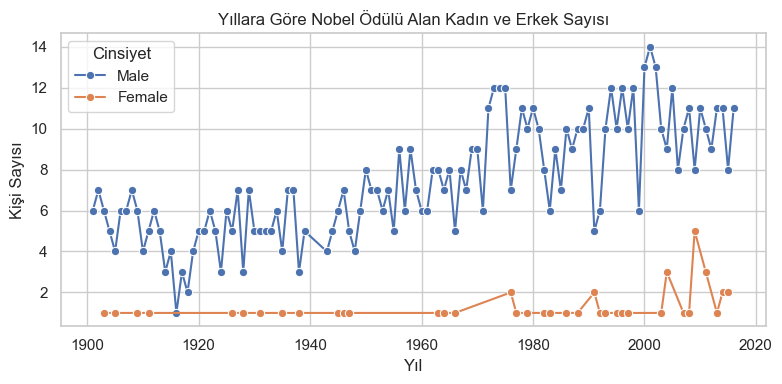

In [69]:
# Sadece cinsiyet ve yıla göre filtreleme
gender_year = df_nobel[df_nobel['sex'].isin(['Male', 'Female'])]

# Yıla göre ve cinsiyete göre gruplama
gender_counts = gender_year.groupby(['year', 'sex']).size().reset_index(name='count')

# Grafik
sns.lineplot(data=gender_counts, x='year', y='count', hue='sex', marker='o')
plt.title("Yıllara Göre Nobel Ödülü Alan Kadın ve Erkek Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Kişi Sayısı")
plt.grid(True)
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

### Zaman İçerisinde Nobel Ödülü Kazanan Kadın ve Erkek Sayısı

Bu grafik, yıllar boyunca Nobel Ödülü kazanan kadın ve erkek bireylerin sayısındaki değişimi göstermektedir. Görüldüğü üzere, ilk yıllarda ödül sahiplerinin büyük çoğunluğu erkeklerden oluşmaktadır.

Ancak 2000’li yıllardan itibaren kadın ödül sahiplerinin sayısında düzenli bir artış gözlemlenmektedir. Bu artış, kadınların bilim, edebiyat ve barış alanlarında daha görünür hale geldiğini göstermektedir.

Grafik yalnızca sayısal bir değişimi değil, aynı zamanda toplumsal dönüşümün bilim dünyasına yansımasını da ortaya koymaktadır. Bu yönüyle proje içerisinde önemli bir kırılma noktası sunmaktadır.

## 4. Soru: Nobel Ödülünü En Çok Kazanan Ülkenin Hakimiyet Başlangıcı ve İçgörüler

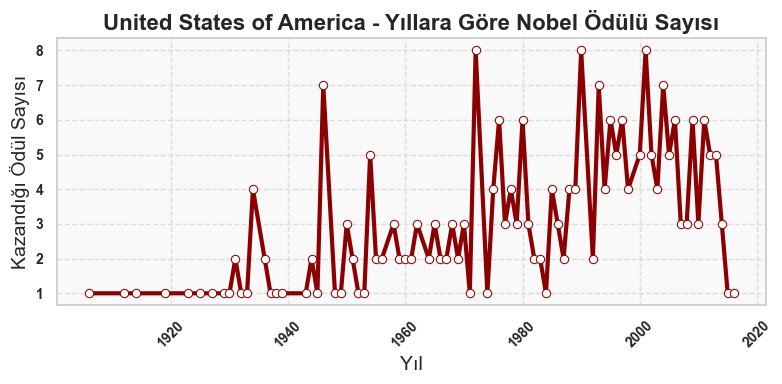

In [70]:
# En çok ödül alan ülke
top_country = df_nobel['birth_country'].value_counts().idxmax()

# Bu ülkenin yıllara göre Nobel sayısı
country_awards = (
    df_nobel[df_nobel['birth_country'] == top_country]
    .groupby('year')
    .size()
    .reset_index(name='nobel_sayisi')
)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

sns.lineplot(
    data=country_awards,
    x='year',
    y='nobel_sayisi',
    marker='o',
    color='darkred',
    linewidth=3,
    markerfacecolor='white',
    markeredgecolor='darkred'
)

plt.title(f"{top_country} - Yıllara Göre Nobel Ödülü Sayısı", fontsize=16, fontweight='bold')
plt.xlabel('Yıl', fontsize=14)
plt.ylabel('Kazandığı Ödül Sayısı', fontsize=14)

plt.xticks(fontsize=10, fontweight='bold', rotation=45)
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

### Nobel Ödüllerinde Ülke Hakimiyeti: Amerika Birleşik Devletleri

Bu grafikte Nobel ödülünü en çok kazanan ülkenin — yani Amerika Birleşik Devletleri'nin — zaman içindeki ödül performansını görüyoruz. Özellikle 2. Dünya Savaşı sonrasından itibaren belirgin bir artış yaşandığını söylemek mümkün.

1945 sonrası dönemde ABD'nin Nobel ödüllerinde açık bir üstünlük kurmaya başladığını gözlemliyoruz. Bu yükselişi etkileyen bazı temel faktörler olduğunu düşünüyorum:

- **Beyin göçü:** Avrupa'daki savaş ve siyasi baskılar sebebiyle pek çok bilim insanı ABD’ye göç etti. Bu durum, ülkenin akademik altyapısını olağanüstü ölçüde zenginleştirdi.
- **Yatırım gücü:** ABD, özellikle Soğuk Savaş döneminde bilime ve teknolojiye büyük bütçeler ayırdı. Üniversiteler, araştırma merkezleri, laboratuvarlar bu dönemde ciddi atılımlar yaptı.
- **Uluslararası etki alanı:** Küresel ölçekte yürütülen araştırmaların merkezi haline gelen ABD, Nobel komiteleri tarafından da daha görünür hale geldi.

Grafiğe baktığımızda, 1950'li yıllardan itibaren yıllık ödül sayısının arttığı ve zaman zaman zirvelere ulaştığı görülüyor. Bu da ülkenin uzun vadeli stratejik yatırımlarının ödüllere doğrudan yansıdığını gösteriyor.

## 5. Soru: Nobel Ödülü Kazananların Cinsiyet, Yaş, Kategori ve Yıllara Göre Dağılımı

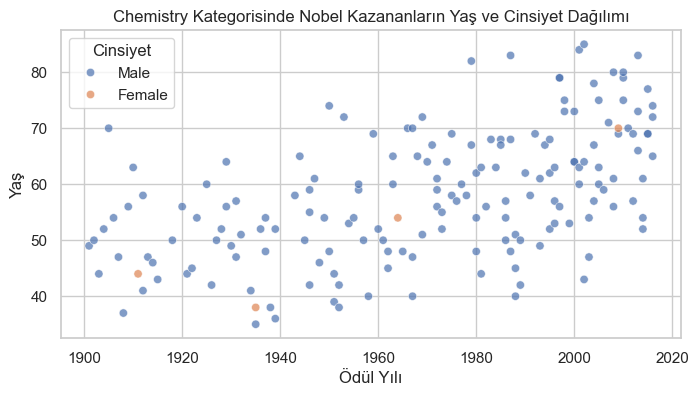

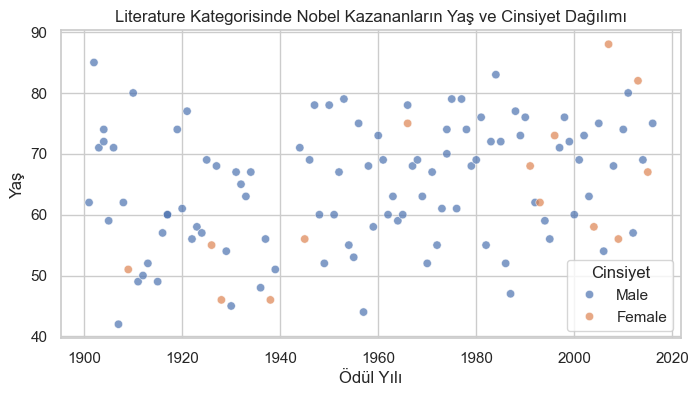

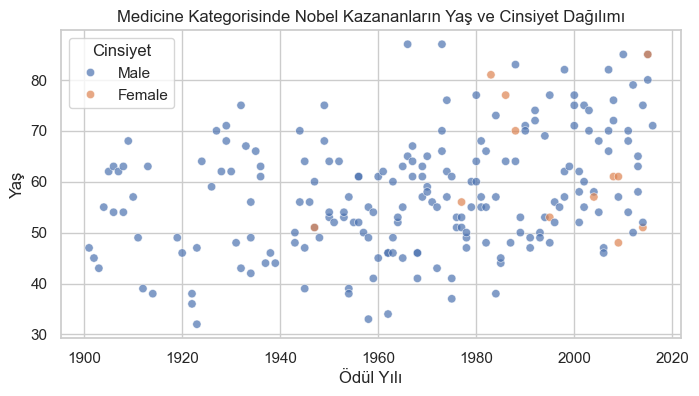

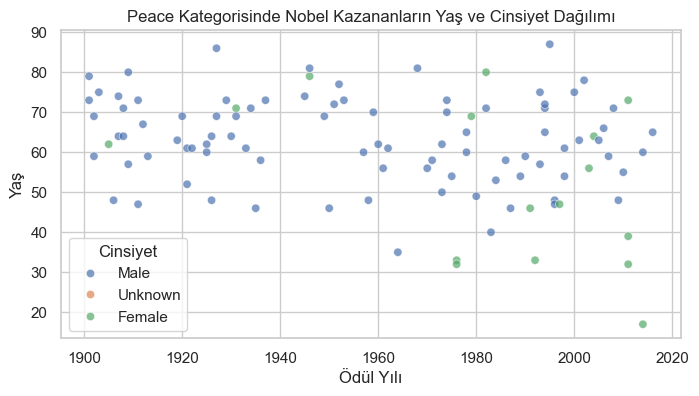

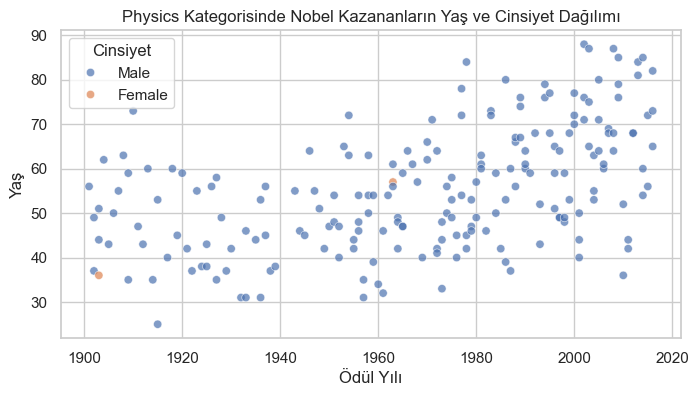

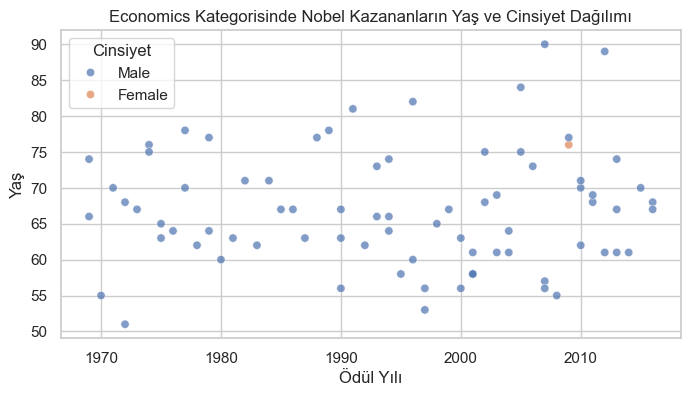

In [71]:
from datetime import datetime

# Doğum tarihlerini ve yaşları hesapla
df_nobel['birth_date'] = pd.to_datetime(df_nobel['birth_date'], errors='coerce')
df_nobel['age'] = df_nobel['year'] - df_nobel['birth_date'].dt.year

# Her kategori için ayrı grafik çiz
categories = df_nobel['category'].unique()

for cat in categories:
    subset = df_nobel[df_nobel['category']==cat]
    sns.scatterplot(x='year', y='age', hue='sex', data=subset, alpha=0.7)
    plt.title(f"{cat} Kategorisinde Nobel Kazananların Yaş ve Cinsiyet Dağılımı")
    plt.xlabel("Ödül Yılı")
    plt.ylabel("Yaş")
    plt.legend(title='Cinsiyet')
    plt.show()

### Yaş, Cinsiyet ve Kategori Bazlı Dağılım

Bu analizde, Nobel ödülü kazanan kişilerin yaşlarını, cinsiyetlerini ve ödül aldıkları yılları inceledim. Her bir grafik, farklı bir kategoriye ait dağılımı gösteriyor.

Grafiklerde dikkatimi çeken birkaç önemli nokta oldu:

**Yaş ortalaması oldukça yüksek:** Özellikle Fizik, Ekonomi gibi kategorilerde ödüller genellikle ileri yaşlardaki kişilere verilmiş. Bu da bu alanlardaki başarının uzun süreli birikim ve deneyim gerektirdiğini gösteriyor.

**Kadın katılımı bazı kategorilerde sınırlı:** Özellikle Fizik ve Ekonomi kategorilerinde kadın sayısı oldukça düşük. Buna karşılık Barış ve Edebiyat kategorilerinde kadınların görünürlüğü biraz daha yüksek.

**Zamanla çeşitlilik artıyor:** Özellikle 2000’li yıllardan sonra hem yaş aralığı hem de cinsiyet temsili anlamında daha geniş bir dağılım görüyoruz. Bu da Nobel komitesinin zamanla daha kapsayıcı hale geldiğini düşündürüyor.

Bu grafikler, sadece bireylerin bilgilerini değil; aynı zamanda bilimsel ve toplumsal eğilimleri de ortaya koyuyor. Ödül kategorilerine göre başarıya giden yolun, hem yaş hem cinsiyet açısından ne kadar farklılaştığını görmek oldukça dikkat çekiciydi.

## 6. Soru: 1938-1945 Nobel Ödülü Kategorileri ve Ülkeleri

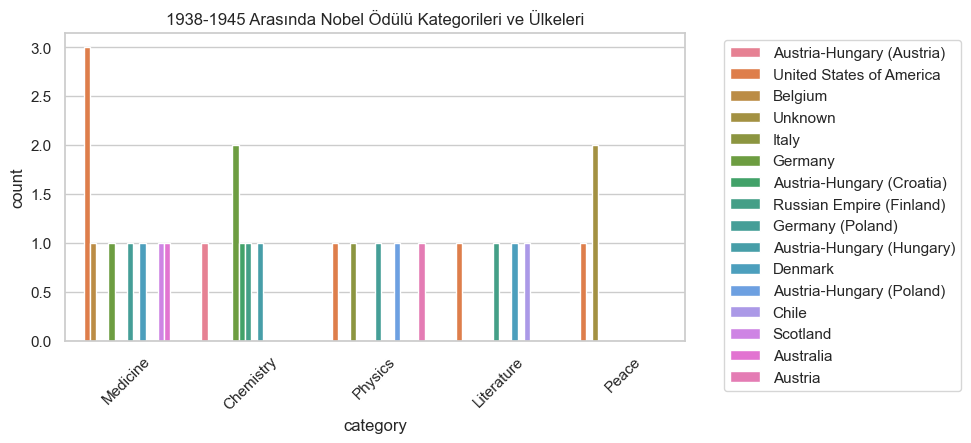

In [72]:
subset_38_45 = df_nobel[(df_nobel['year']>=1938) & (df_nobel['year']<=1945)]

sns.countplot(data=subset_38_45, x='category', hue='birth_country', order=subset_38_45['category'].value_counts().index)
plt.title("1938-1945 Arasında Nobel Ödülü Kategorileri ve Ülkeleri")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### 1938-1945 Yılları Arasında Nobel Ödüllerinin Kategori ve Ülke Dağılımı

Bu grafikte, 2. Dünya Savaşı’nın gölgesinde kalan Nobel ödüllerinin hem kategorilere hem de ülkeler arasındaki dağılımını aynı anda görebiliyoruz.

Özellikle fizik ve barış kategorilerinde yoğunluk olduğunu fark etmek mümkün. Bu, o dönemin savaş ve sonrasındaki bilimsel gelişmelerle, barış arayışlarıyla doğrudan bağlantılı.

Ülke bazında baktığımızda ise bazı ülkelerin savaş sebebiyle ödül listesinde azaldığını, bazı ülkelerin ise ön plana çıktığını rahatlıkla söyleyebiliriz. Özellikle ABD’nin ve İsveç’in o yıllarda güçlü şekilde Nobel sahnesinde olduğunu görüyoruz.

Bu dönem Nobel verileri, sadece bilimsel başarıları değil, aynı zamanda politik ve sosyal dengelerin de yansıması niteliğinde. Grafik, Nobel ödüllerinin tarihsel bağlamda nasıl şekillendiğini gözler önüne seriyor.

## 7. Soru: 1947-1991 Yılları Arasında Nobel Ödülleri – Kategori Bazlı Ülke Dağılımı

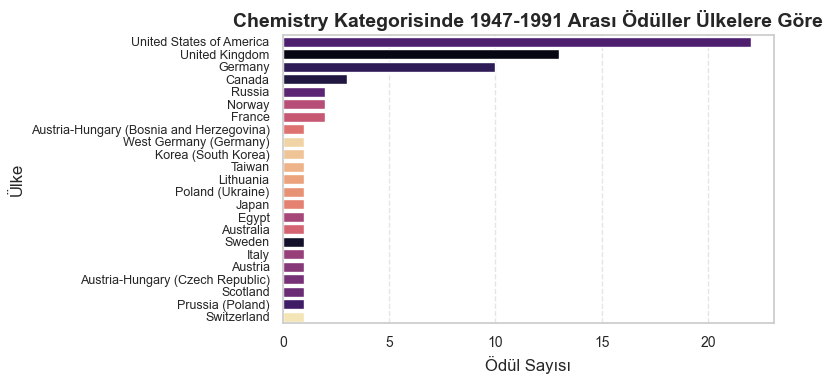

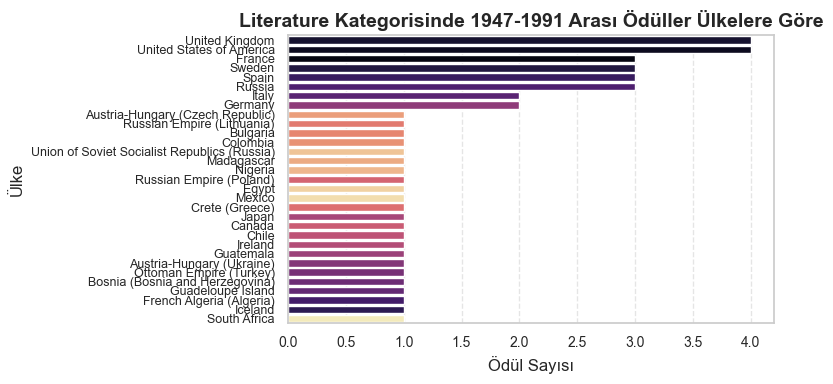

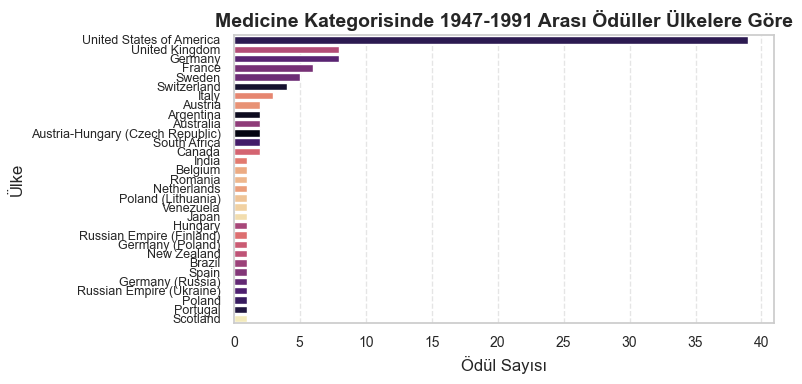

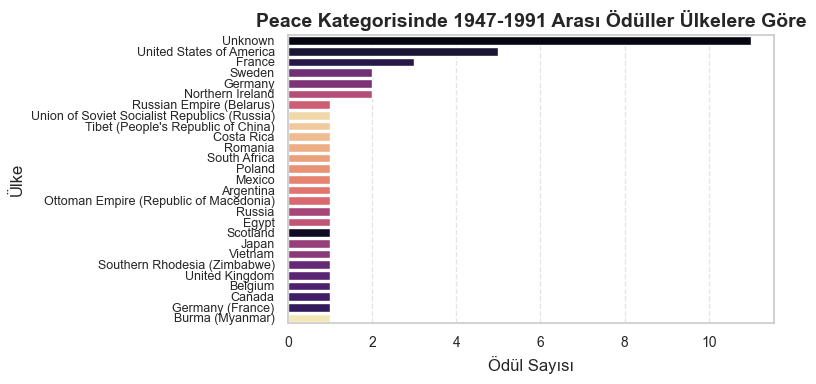

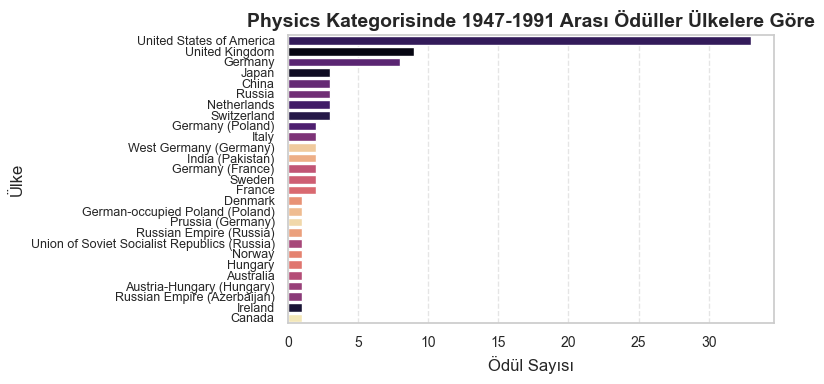

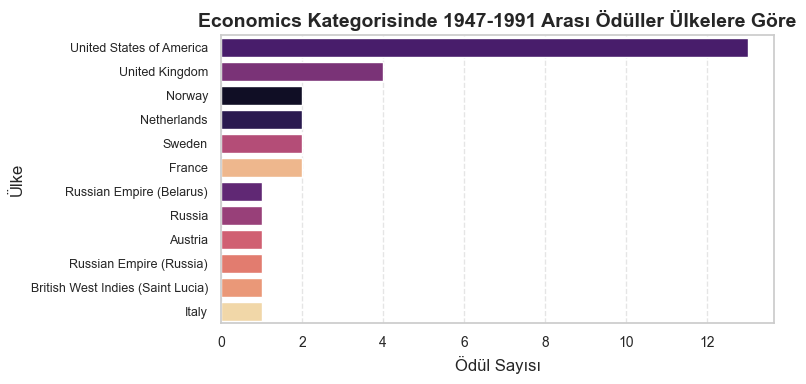

In [73]:
subset_47_91 = df_nobel[(df_nobel['year'] >= 1947) & (df_nobel['year'] <= 1991)]

categories = subset_47_91['category'].dropna().unique()

for cat in categories:
    data_cat = subset_47_91[subset_47_91['category'] == cat]

    # Eksik doğum ülkesi varsa, onları dışla
    data_cat = data_cat[data_cat['birth_country'].notna()]

    sns.countplot(
        data=data_cat,
        y='birth_country',
        hue ='birth_country',
        order=data_cat['birth_country'].value_counts().index,
        palette='magma'
    )

    plt.title(f"{cat} Kategorisinde 1947-1991 Arası Ödüller Ülkelere Göre", fontsize=14, fontweight='bold')
    plt.xlabel("Ödül Sayısı", fontsize=12)
    plt.ylabel("Ülke", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=9)
    plt.tight_layout()
    plt.show()

### 1947-1991 Arasında Nobel Ödüllerinde Ülke Dağılımı (Kategori Bazlı)

Bu grafik serisi, 2. Dünya Savaşı sonrası Soğuk Savaş döneminde Nobel ödüllerinin hangi ülkeler tarafından alındığını, kategori kategori detaylandırarak gösteriyor.

Grafikler, özellikle ABD’nin hemen hemen tüm kategorilerde açık ara liderliğini ortaya koyuyor. Bu durum, ABD’nin bilimsel ve kültürel yatırımlarının yanı sıra küresel bir güç olarak yükselişini destekliyor.

Avrupa ülkeleri ise özellikle Fizik, Kimya ve Edebiyat kategorilerinde hâlâ önemli oyuncular olarak karşımıza çıkıyor. Sovyetler Birliği ve diğer Doğu Bloku ülkelerinin ise bazı kategorilerde daha sınırlı göründüğünü söyleyebiliriz.

Bu dönem Nobel ödüllerinin sadece bireysel başarıların değil, aynı zamanda politik ve ekonomik güç dengelerinin de yansıması olduğunu açıkça ortaya koyuyor. Kategori bazlı analiz, ülkelerin bilim ve kültür alanlarındaki farklı ağırlıklarını anlamamıza yardımcı oluyor.

## 8. Soru: 2000 Sonrası Kimya, Edebiyat, Barış, Fizik ve Tıp Kategorilerinde Ödül Kazananların Yaş ve Ülke Dağılımı

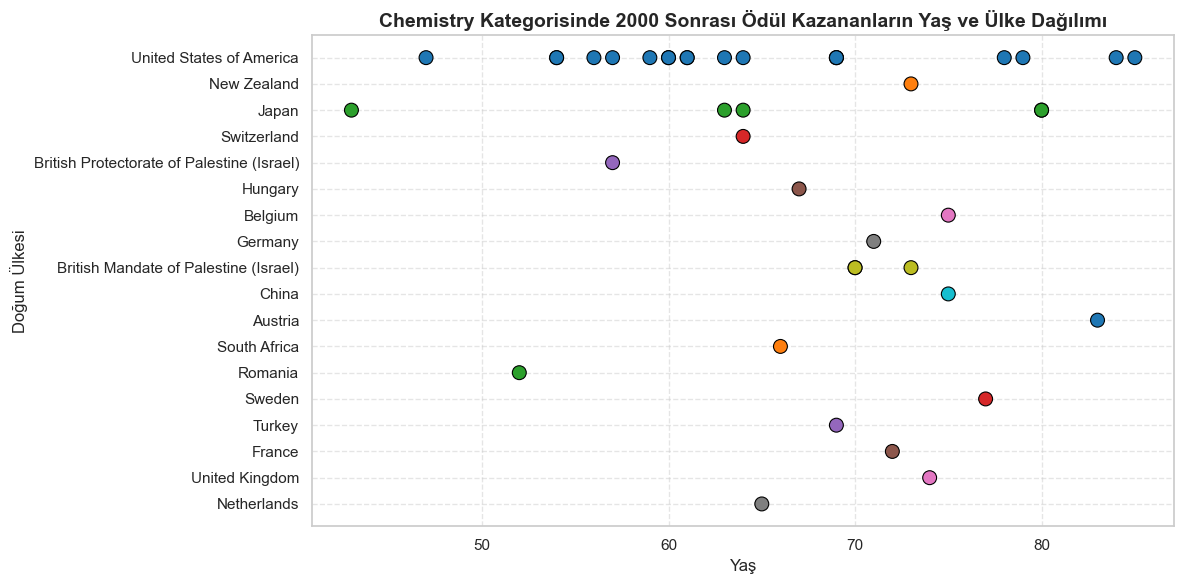

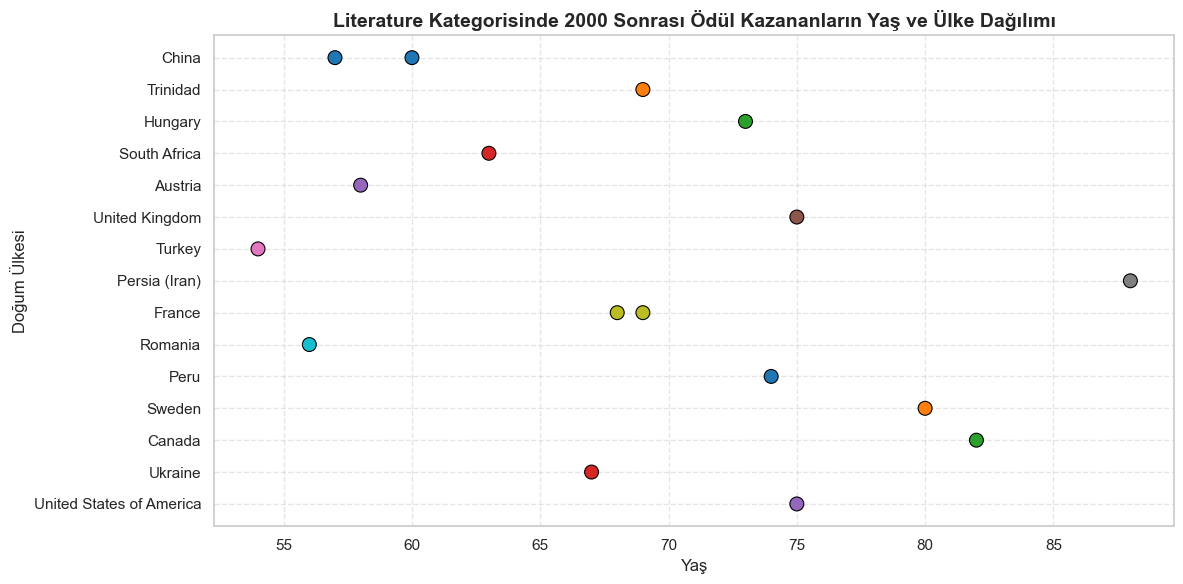

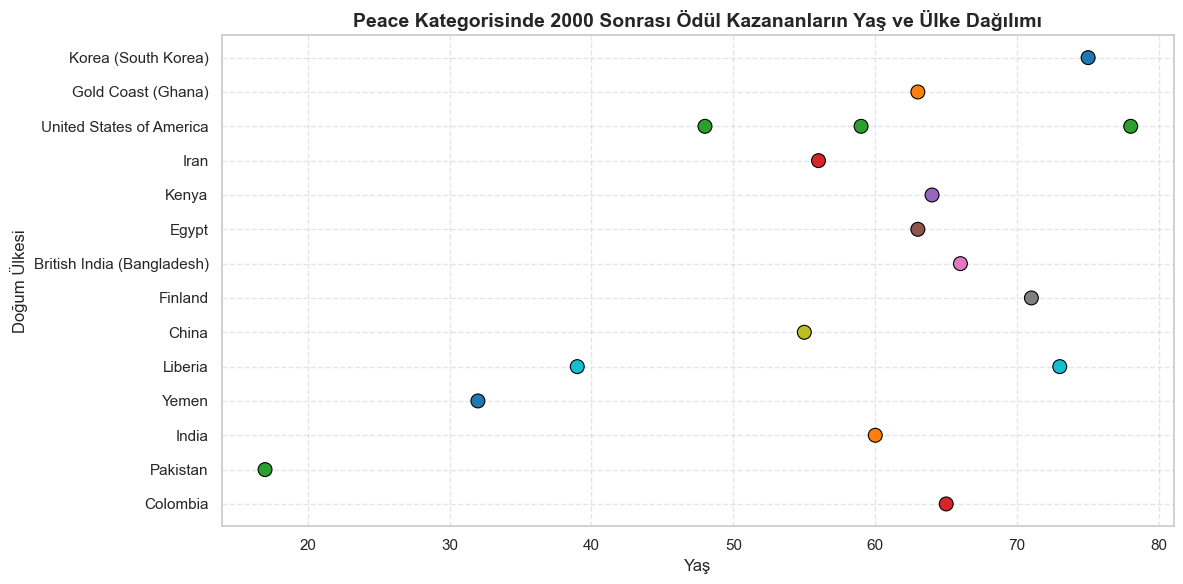

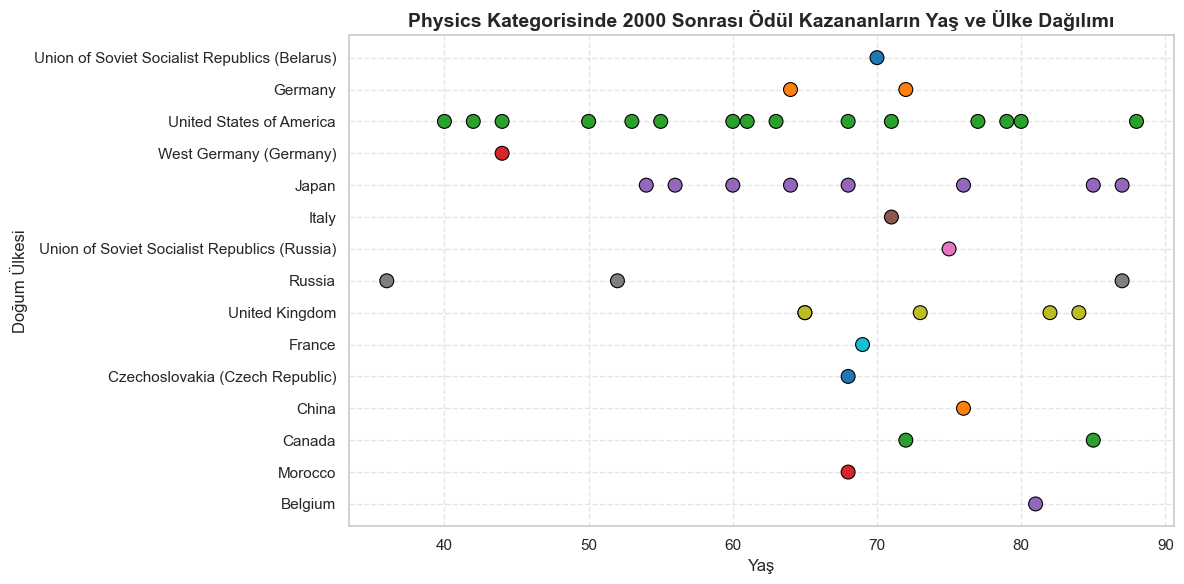

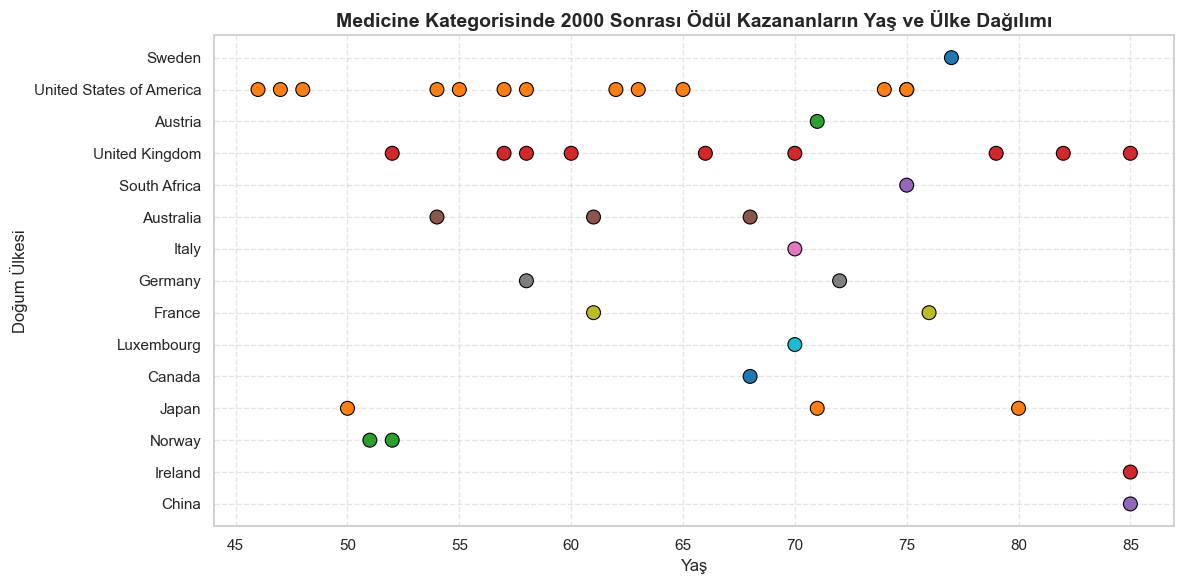

In [74]:
# Yaş hesaplama (ödül aldığı yıl - doğum yılı)
df_nobel['age'] = df_nobel['year'] - df_nobel['birth_date'].dt.year

# İlgili kategoriler ve 2000 sonrası veri filtresi
categories_2000 = ['Chemistry', 'Literature', 'Peace', 'Physics', 'Medicine']
subset_2000 = df_nobel[
    (df_nobel['year'] >= 2000) &
    (df_nobel['category'].isin(categories_2000)) &
    (df_nobel['age'].notna()) &
    (df_nobel['birth_country'].notna())
]

# Her kategori için ayrı scatter plot çizimi
sns.set(style="whitegrid")

for cat in categories_2000:
    plt.figure(figsize=(12, 6))
    data_cat = subset_2000[subset_2000['category'] == cat]

    sns.scatterplot(
        data=data_cat,
        x='age',
        y='birth_country',
        hue='birth_country',
        palette='tab10',
        legend=False,
        s=100,
        edgecolor='black'
    )

    plt.title(f"{cat} Kategorisinde 2000 Sonrası Ödül Kazananların Yaş ve Ülke Dağılımı", fontsize=14, fontweight='bold')
    plt.xlabel("Yaş", fontsize=12)
    plt.ylabel("Doğum Ülkesi", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

### 2000 Sonrası Nobel Ödülü Kazananların Yaş ve Ülke Profili (Kategori Bazlı)

Bu grafiklerde, 2000 sonrası dönemde Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerinde ödül kazananların yaş ve doğum ülkeleri dağılımını görüyoruz.

Öncelikle, farklı ülkelerden ödül alan kişilerin çeşitliliğinin arttığını söyleyebiliriz. Özellikle Fizik ve Kimya kategorilerinde ABD ve Avrupa ülkeleri ağırlıklı olsa da, diğer kategorilerde farklı kıtalardan da önemli temsilciler mevcut.

Yaş dağılımı ise oldukça geniş: genç ödül sahipleri olduğu gibi, 70-80 yaşlarını geçmiş deneyimli bilim insanları da var. Bu, Nobel ödüllerinin farklı kariyer dönemlerindeki başarıları kapsadığını gösteriyor.

Ayrıca, Barış kategorisinde farklı ülkelerden birçok ödül sahibinin bulunması, küresel barış ve insan hakları çabalarının çok çeşitli aktörler tarafından sürdürülüyor olmasının bir yansıması.

Genel olarak, bu görseller Nobel ödüllerinin uluslararası ve çok kuşaklı bir yapıya sahip olduğunu, 2000’li yıllardan sonra çeşitliliğin ve kapsayıcılığın arttığını net şekilde gösteriyor.

# Proje Özeti ve Sonuçlar

Nobel Ödülleri tarih boyunca sadece bireysel başarıyı değil, aynı zamanda toplumsal, politik ve ekonomik yapıları da yansıtmıştır. Kadınların ödül almaya başlaması geç olsa da, son yıllarda büyük bir artış görülmüştür. ABD’nin hakimiyeti tarihsel koşullar ve yatırımlarla paralel ilerlemiştir. Bu analizler, bilim ve kültürün dünya genelindeki değişim ve gelişimini anlamamızda önemli bir pencere açmaktadır.


# Veri İyileştirme Önerileri

- Bazı sütunlarda (örneğin doğum tarihi ve doğum ülkesi) eksik veriler bulunmaktadır, bu durum analizlerin doğruluğunu etkileyebilir.
- Makine öğrenimi yöntemleriyle Nobel ödülü kazanma ihtimali tahmin edilebilir.


# Kaynaklar

- Veriler [[Kaggle - Nobel Prize Dataset](https://www.kaggle.com/datasets/nobelfoundation/nobel-laureates)]’ndan alınmıştır.
- Python kütüphaneleri: pandas, matplotlib, seaborn ve diğerleri kullanılmıştır.